In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
df = pd.read_excel('Guting107.xls')

In [57]:
df.head()

,Unnamed: 0,日期,測站,測項,00,01,02,03,04,05,...,14,15,16,17,18,19,20,21,22,23
0,0,2018/01/01,古亭,AMB_TEMP,15.4,15.4,15.4,15.4,15.5,15.6,...,18.8,18.3,17.8,17.5,17.3,17.3,17.3,17.8,18.3,18.6
1,1,2018/01/01,古亭,CH4,1.9,1.9,1.9,1.9,1.9,1.9,...,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9
2,2,2018/01/01,古亭,CO,0.34,0.31,0.26,0.25,0.25,0.25,...,0.35,0.39,0.4,0.52,0.53,0.55,0.55,0.53,0.43,0.36
3,3,2018/01/01,古亭,NMHC,0.06,0.05,0.04,0.04,0.04,0.04,...,0.06,0.06,0.06,0.1,0.11,0.12,0.11,0.11,0.08,0.06
4,4,2018/01/01,古亭,NO,0.7,1,0.9,0.7,0.4,0.9,...,1.8,1.5,1.3,1.5,1.6,1.7,1.9,2.1,1.6,1


In [58]:
import datetime
df = df.drop(columns='測站')
df = df.rename(columns={'日期':'Date', '測項':'Object'})
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [59]:
df = df.dropna(axis=0)
df = df[df['Object'] != 'RAINFALL']

In [60]:
df.head()

,Unnamed: 0,Object,00,01,02,03,04,05,06,07,...,14,15,16,17,18,19,20,21,22,23
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0,AMB_TEMP,15.4,15.4,15.4,15.4,15.5,15.6,15.7,16,...,18.8,18.3,17.8,17.5,17.3,17.3,17.3,17.8,18.3,18.6
2018-01-01,1,CH4,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,...,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9
2018-01-01,2,CO,0.34,0.31,0.26,0.25,0.25,0.25,0.27,0.3,...,0.35,0.39,0.4,0.52,0.53,0.55,0.55,0.53,0.43,0.36
2018-01-01,3,NMHC,0.06,0.05,0.04,0.04,0.04,0.04,0.04,0.05,...,0.06,0.06,0.06,0.1,0.11,0.12,0.11,0.11,0.08,0.06
2018-01-01,4,NO,0.7,1,0.9,0.7,0.4,0.9,0.8,1,...,1.8,1.5,1.3,1.5,1.6,1.7,1.9,2.1,1.6,1


In [61]:
daily_datas = df['2018-01-01':'2018-01-01']
daily_datas = daily_datas.reset_index()
daily_datas = daily_datas.set_index('Object')
daily_datas = daily_datas.drop(columns='Date')
daily_datas.head()

,Unnamed: 0,00,01,02,03,04,05,06,07,08,...,14,15,16,17,18,19,20,21,22,23
Object,,,,,,,,,,,,,,,,,,,,,
AMB_TEMP,0,15.4,15.4,15.4,15.4,15.5,15.6,15.7,16,16.5,...,18.8,18.3,17.8,17.5,17.3,17.3,17.3,17.8,18.3,18.6
CH4,1,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,...,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9
CO,2,0.34,0.31,0.26,0.25,0.25,0.25,0.27,0.3,0.32,...,0.35,0.39,0.4,0.52,0.53,0.55,0.55,0.53,0.43,0.36
NMHC,3,0.06,0.05,0.04,0.04,0.04,0.04,0.04,0.05,0.06,...,0.06,0.06,0.06,0.1,0.11,0.12,0.11,0.11,0.08,0.06
NO,4,0.7,1,0.9,0.7,0.4,0.9,0.8,1,1.2,...,1.8,1.5,1.3,1.5,1.6,1.7,1.9,2.1,1.6,1


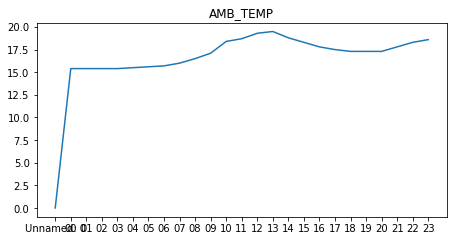

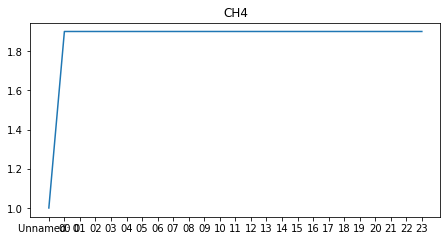

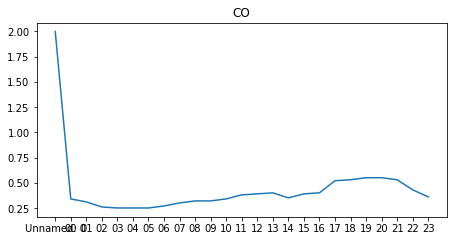

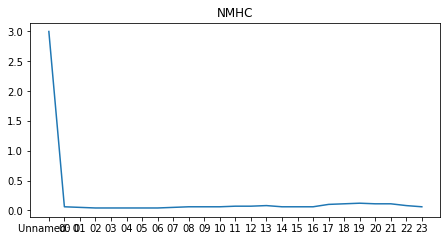

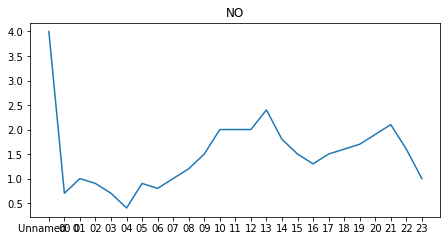

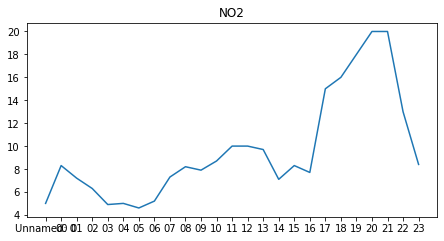

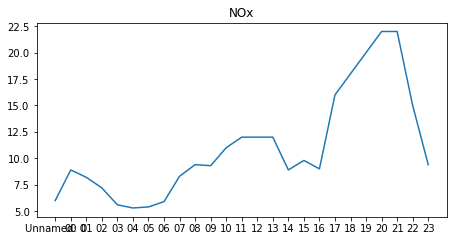

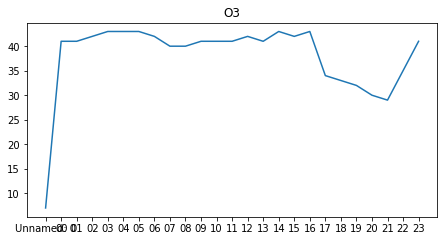

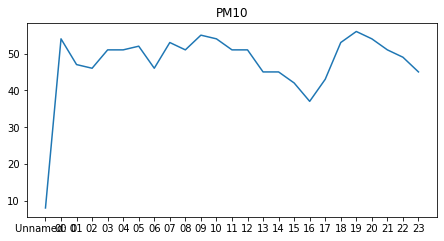

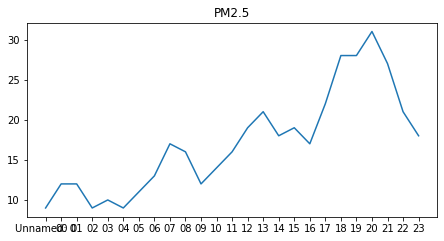

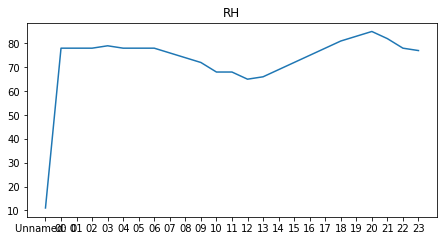

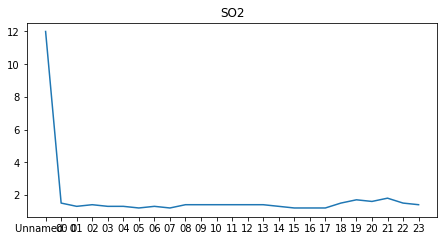

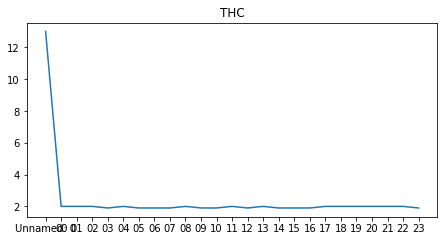

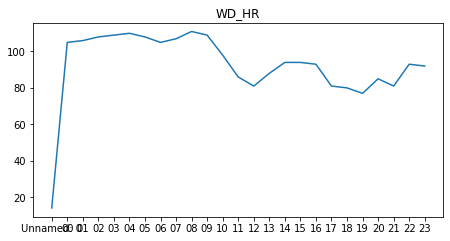

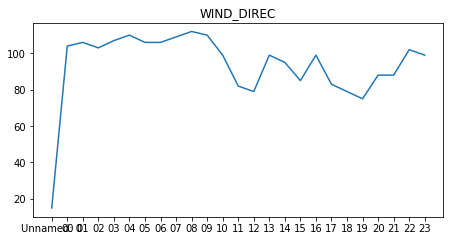

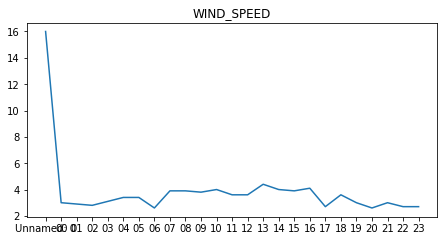

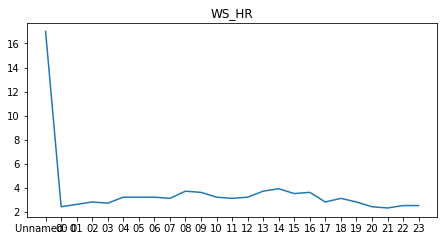

In [62]:
daily_datas = daily_datas.T
Objects = daily_datas.columns.to_list()
ALL_datas = []
for i in Objects:
    ALL_datas.append(daily_datas[i])

for a in range(len(Objects)):
    plt.figure(figsize=(25, 25))
    plt.subplot(6, 3, a+1)
    plt.title(str(Objects[a]))
    plt.plot(ALL_datas[a])